In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[7]


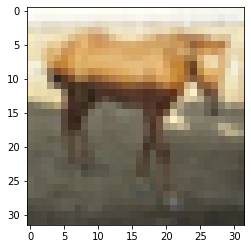

In [7]:
i = 2000
plt.imshow(X_train[i])
print(y_train[i])

/Users/xiaolinzhao/anaconda3/envs/tf/lib/python3.8/site-packages/matplotlib/text.py:1163: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


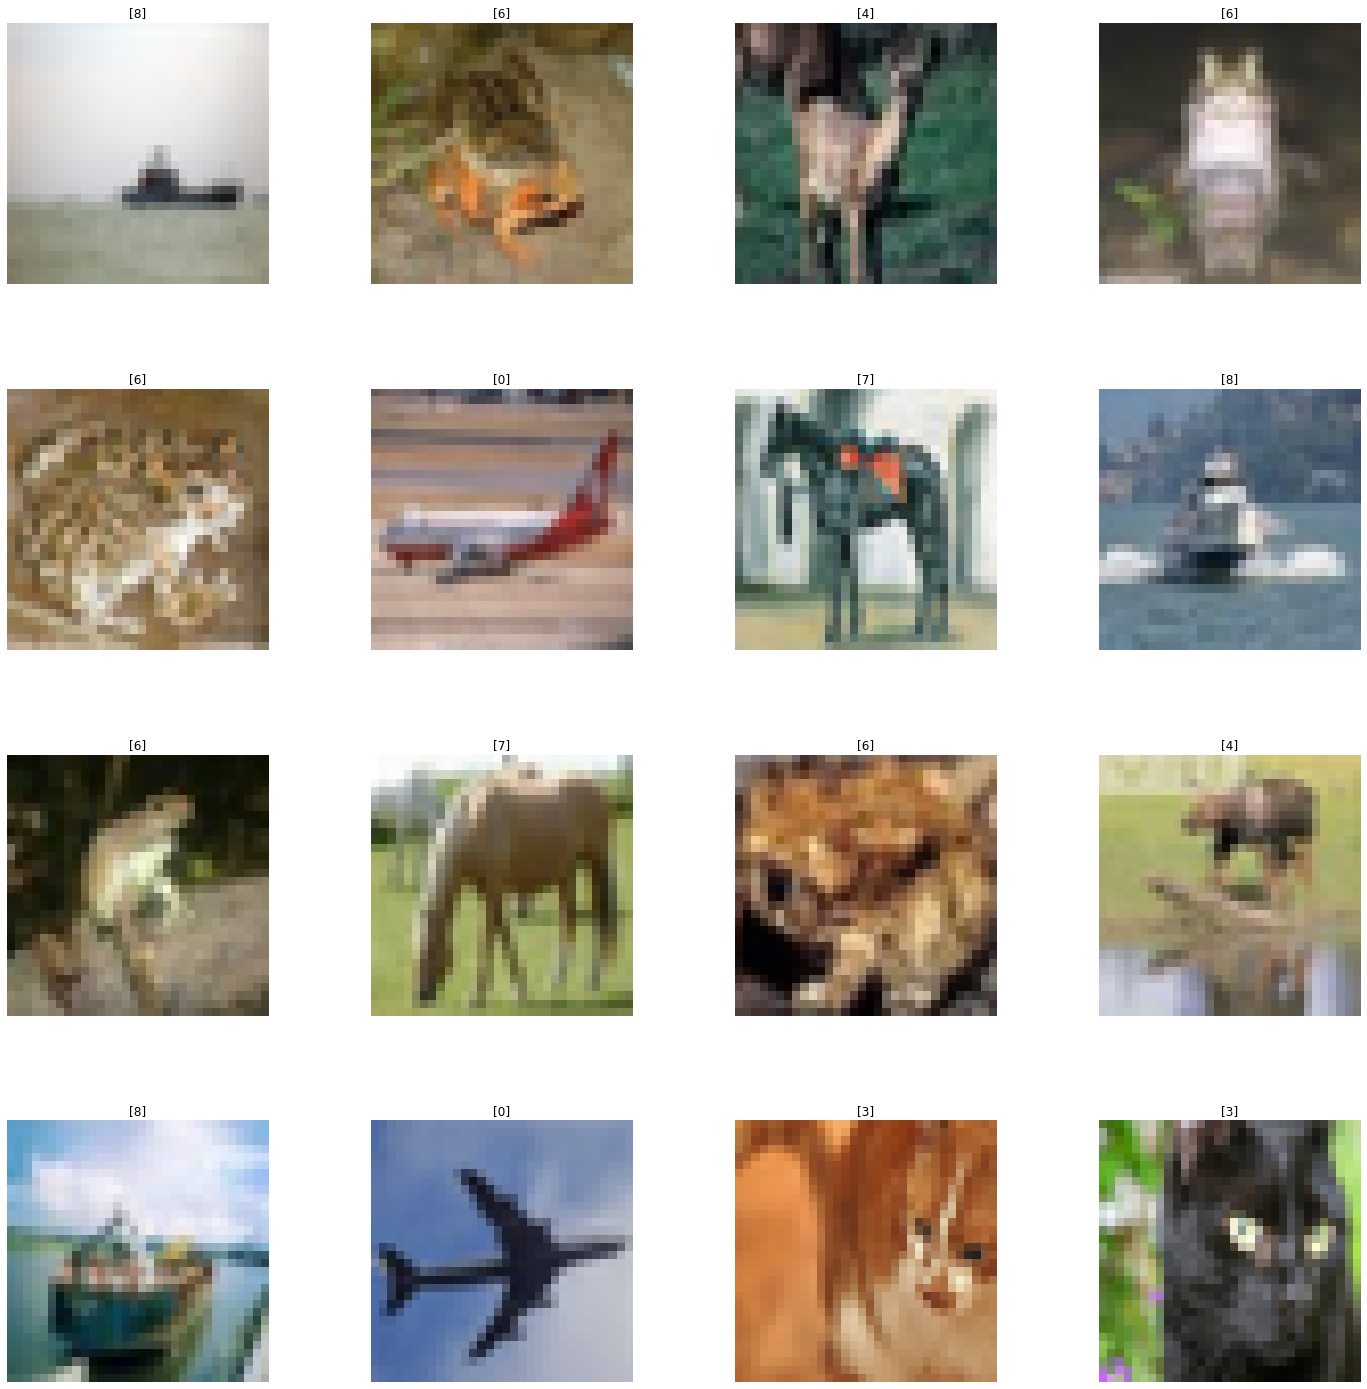

In [8]:
W_grid = 4
L_grid = 4

fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [9]:
n_training

50000

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)  # convert to label array

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [18]:
X_train = X_train / 255  # convert to 0-1
X_test = X_test / 255

In [20]:
X_train.shape

(50000, 32, 32, 3)

In [21]:
X_train[0,...]

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [22]:
X_train.shape

(50000, 32, 32, 3)

In [23]:
Input_shape = X_train.shape[1:]

In [24]:
Input_shape  # skip the first value 50000

(32, 32, 3)

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [26]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=1024, activation='relu'))

cnn_model.add(Dense(units=10, activation='softmax'))


In [27]:
cnn_model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

In [28]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=30, shuffle=True)

Epoch 1/30
1563/1563 [==============================] - 310s 198ms/step - loss: 1.6398 - accuracy: 0.4128
Epoch 2/30
1563/1563 [==============================] - 315s 202ms/step - loss: 1.2319 - accuracy: 0.5750
Epoch 3/30
1563/1563 [==============================] - 325s 208ms/step - loss: 1.1227 - accuracy: 0.6185
Epoch 4/30
1563/1563 [==============================] - 972s 622ms/step - loss: 1.0732 - accuracy: 0.6396
Epoch 5/30
1563/1563 [==============================] - 331s 212ms/step - loss: 1.0416 - accuracy: 0.6512
Epoch 6/30
1563/1563 [==============================] - 353s 226ms/step - loss: 1.0316 - accuracy: 0.6564
Epoch 7/30
1563/1563 [==============================] - 337s 216ms/step - loss: 1.0269 - accuracy: 0.6590
Epoch 8/30
1563/1563 [==============================] - 415s 265ms/step - loss: 1.0207 - accuracy: 0.6666
Epoch 9/30
1563/1563 [==============================] - 458s 293ms/step - loss: 1.0070 - accuracy: 0.6700
Epoch 10/30
1563/1563 [=======================

# Evaluate the model

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 15s 47ms/step - loss: 1.1730 - accuracy: 0.6225
Test Accuracy: 0.6225000023841858


In [30]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([3, 8, 9, ..., 5, 9, 7])

In [73]:
(_, _), (_, y_test) = cifar10.load_data()

In [74]:
y_test_vector = y_test.argmax(1)

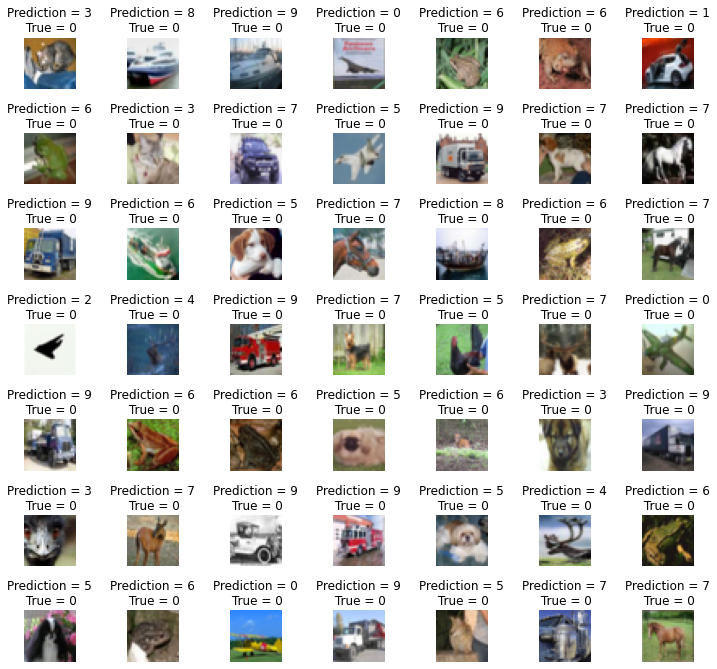

In [75]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i] / 255)
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test.argmax(1)[i]))
    axes[i].axis('off')

    plt.subplots_adjust(wspace=1)

# Save the model

<AxesSubplot:>

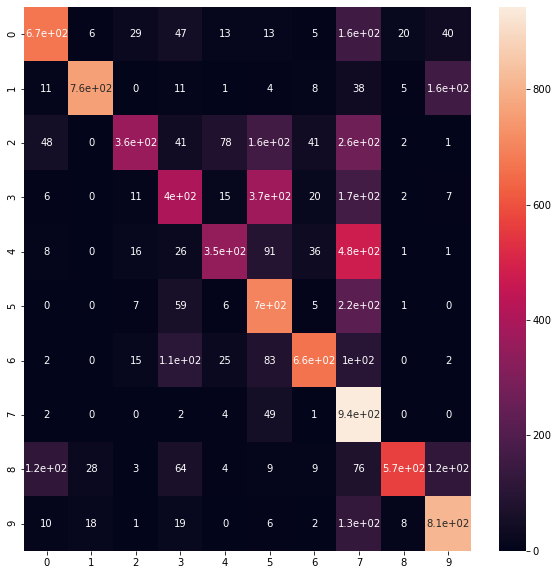

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

In [77]:
import os
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

# data_augmentation

In [78]:
import keras
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [79]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [80]:
X_train.shape

(50000, 32, 32, 3)

In [81]:
n = 8
X_train_sample = X_train[:n]

In [82]:
X_train_sample.shape

(8, 32, 32, 3)

In [83]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)

# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1,3))

dataget_train.fit(X_train_sample)

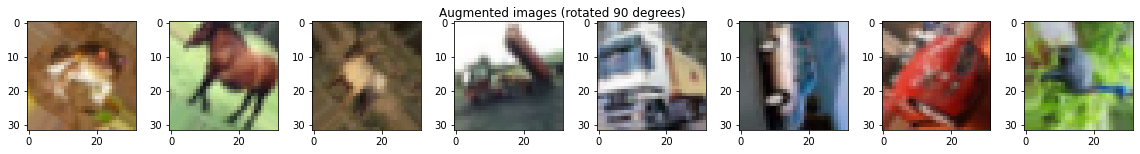

In [84]:
from PIL import Image

fig = plt.figure(figsize=(20, 2))
for x_batch in dataget_train.flow(X_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, i+1)
        ax.imshow(Image.fromarray(np.uint8(x_batch[i])))
    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break

# Model training using augemented dataset

In [85]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                            rotation_range=90,
                            width_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=True,
                            )

In [86]:
datagen.fit(X_train)

In [87]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size=32), epochs=2)

Epoch 1/2
1563/1563 [==============================] - 330s 211ms/step - loss: 111.3505 - accuracy: 0.0000e+00
Epoch 2/2
1563/1563 [==============================] - 355s 227ms/step - loss: 111.3400 - accuracy: 0.0000e+00


In [88]:
X_test.shape

(10000, 32, 32, 3)

In [103]:
y_test_new = []
for i in y_test:
    y_test_new.append([0] * 10)
    y_test_new[-1][i[0]] = 1
y_test_new = np.asarray(y_test_new)
print(y_test_new.shape)

(10000, 10)


In [105]:
score = cnn_model.evaluate(X_test, y_test_new)
print('Test accuracy', score[1])

313/313 [==============================] - 13s 42ms/step - loss: 2.4741 - accuracy: 0.1000
Test accuracy 0.10000000149011612


In [106]:
# save the model
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)